In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier  
from imblearn.over_sampling import RandomOverSampler

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Rainfall.csv')

In [5]:
df.rename(str.strip, axis='columns', inplace=True)

In [6]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

In [7]:
df.replace({'yes': 1, 'no': 0}, inplace=True)

In [8]:
df.drop(['maxtemp', 'mintemp'], axis=1, inplace=True)

In [9]:
features = df.drop(['day', 'rainfall'], axis=1)
target = df['rainfall']

In [10]:
X_train, X_val, Y_train, Y_val = train_test_split(
    features, target, test_size=0.2, stratify=target, random_state=2)

In [11]:
ros = RandomOverSampler(sampling_strategy='minority', random_state=22)
X, Y = ros.fit_resample(X_train, Y_train)

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

In [13]:
model = KNeighborsClassifier(n_neighbors=5)  # Default k=5
model.fit(X, Y)

KNeighborsClassifier()

In [14]:
train_preds = model.predict_proba(X)
print('Training Accuracy (AUC) :', metrics.roc_auc_score(Y, train_preds[:, 1]))

Training Accuracy (AUC) : 0.9467185172091613


In [15]:
val_preds = model.predict_proba(X_val)
print('Validation Accuracy (AUC) :', metrics.roc_auc_score(Y_val, val_preds[:, 1]))

Validation Accuracy (AUC) : 0.8445833333333332


In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

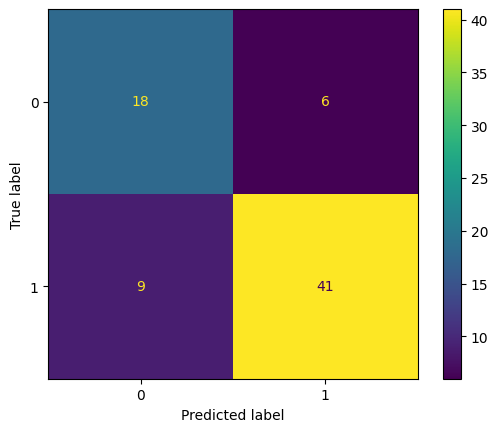

In [17]:
ConfusionMatrixDisplay.from_estimator(model, X_val, Y_val)
plt.show()

In [18]:
print(metrics.classification_report(Y_val, model.predict(X_val)))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71        24
           1       0.87      0.82      0.85        50

    accuracy                           0.80        74
   macro avg       0.77      0.78      0.78        74
weighted avg       0.81      0.80      0.80        74

